# Burgers Equation: Numerical Solution with Finite Differences Method

## Teoria previa

Ecuacion de Burgers (o de adveccion y difusion)

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}
$$

Se tienen las siguientes condicion inicial y de borde
\begin{align*}
u(0,t) = u(L,t) \\
\dfrac{\partial u}{\partial x}(0,t) = \dfrac{\partial u}{\partial x}(L,t)\\
 u(x,0) = 5H(x-l_i) - 5H(x-l_f)
\end{align*}

Discretizando con un esquema de diferencias finitas

\begin{align*}
\frac{\partial u}{\partial t} &= \frac{u_i^{n+1} - u_i^n}{\Delta t} \\
\frac{\partial u}{\partial x} &= \frac{u_i^{n} - u_{i-1}^n}{\Delta x} \\
\frac{\partial^2 u}{\partial x ^2} &= \frac{u_{i+1}^{n} -2u_i^n  + u_{i-1}^n}{\Delta x ^2}
\end{align*}

Aplicando la discretizacion con un Euler explicto en el tiempo

\begin{align*}
\frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^{n} \frac{u_i^{n} - u_{i-1}^n}{\Delta x} &= \nu \frac{u_{i+1}^{n} -2u_i^n  + u_{i-1}^n}{\Delta x ^2} \\
\frac{u_i^{n+1} - u_i^n}{\Delta t} &= - u_i^{n} \frac{u_i^{n} - u_{i-1}^n}{\Delta x} + \nu \frac{u_{i+1}^{n} -2u_i^n  + u_{i-1}^n}{\Delta x ^2} \\
u_i^{n+1} &= u_i^n + \Delta t \left ( - u_i^{n} \frac{u_i^{n} - u_{i-1}^n}{\Delta x} + \nu \frac{u_{i+1}^{n} -2u_i^n  + u_{i-1}^n}{\Delta x ^2} \right ) \\
u_i^{n+1} &= u_i^n + \frac{\Delta t}{\Delta x} \left ( - u_i^{n} (u_i^{n} - u_{i-1}^n) \right ) + \nu \frac{\Delta t}{\Delta x^2}\left ( u_{i+1}^{n} -2u_i^n  + u_{i-1}^n \right )
\end{align*}

Importar modulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import os
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12

## Solucion numerica Burgers con FDM

CFL number 0.07999999999999999
nx 201, tf 6, dt 0.005, nu 0.01


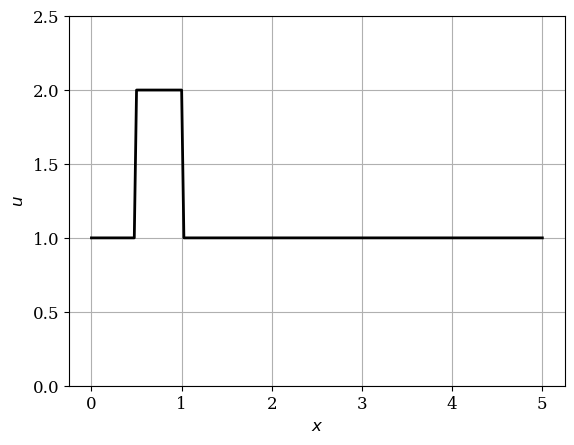

In [2]:
# Physical constants
nu = 0.01
L = 5
li, lf = 0.5,1
tf = 6
nu = 0.01

# Numerical constants
nx = 201
dx = L/(nx-1)
dt = 0.005
nt = int(tf/dt)

# IC and mesh
x  = np.linspace(0, L, nx) 
u0 = np.ones(nx)
u0[int(li/dx):int(lf/dx+1)] = 2.0 #IC
u_ones = np.ones(nx)

# Numerical solution
print(f'CFL number {nu*(dt/(dx**2))}')
print(f'nx {nx}, tf {tf}, dt {dt}, nu {nu}')
u = np.zeros((nx,nt))
u[:,0] = u0.copy()
for n in range(nt-1):
    un = u[:,n].copy()
    for i in range(len(un)):
        if i == 0: #BC x=0
            u[i,n+1] = un[i]+(nu*(dt/(dx**2)))*(un[i+1]-2*un[i]+un[-1]) -(un[i]*(dt/dx))*(un[i]-un[-1]) #En los nodos i e i-1 son el mismo punto
        elif i == int(len(un)-1): # BC x=L
            u[i,n+1] = un[i]+(nu*(dt/(dx**2)))*(un[0]-2*un[i]+un[i-1]) -(un[i]*(dt/dx))*(un[i]-un[i-1])
        else:
            u[i,n+1] = un[i]+(nu*(dt/(dx**2)))*(un[i+1]-2*un[i]+un[i-1]) -(un[i]*(dt/dx))*(un[i]-un[i-1])

# Plot IC condition
plt.grid('minor')
plt.plot(x, u0, c='k', lw=2)
plt.ylim([0,2.5])
plt.ylabel('$u$')
plt.xlabel('$x$')
if not os.path.exists('plots_burgers//'):
    os.makedirs('plots_burgers//')
plt.savefig('plots_burgers//condicion_inicial.png')

## Plot de la solucion en el tiempo

In [16]:
u.shape

(201, 1200)

Text(0.5, 1.0, 'Time 5.0')

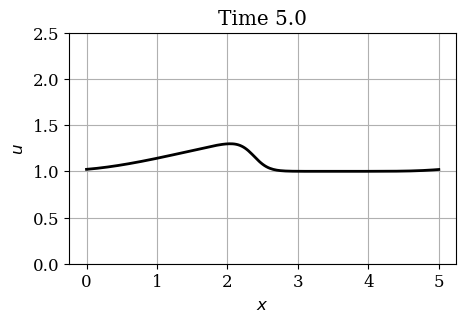

In [15]:
nn = 1000
plt.figure(figsize=(5,3))
plt.grid('minor')
plt.ylabel('$u$')
plt.xlabel('$x$')
plt.plot(x, u[:,nn], c='k', lw=2)
plt.ylim([0,2.5])
plt.title(f'Time {dt*nn}')

In [17]:
for n in range(u.shape[1]):
    plt.figure(figsize=(5,3))
    plt.grid('minor')
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    plt.plot(x, u[:,n], c='k', lw=2)
    plt.ylim([0,2.5])
    plt.title(f'Time {dt*n:.2f}')
    plt.savefig(f'plots_burgers//burgers_{n}.png')
    # if n % int(u.shape[1]/3) == 0:
    #     plt.show()
    plt.close()

## SVD decomposition

$
u(x,t) = U \Sigma V^*
$

In [3]:
U, S, Vh = np.linalg.svd(u, full_matrices=True)


In [4]:
np.sum(S[:5]**2)/np.sum(S[:]**2)

0.9962771859679049

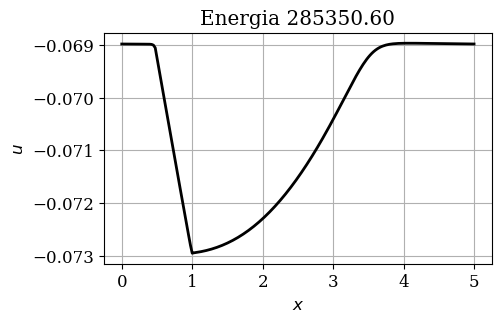

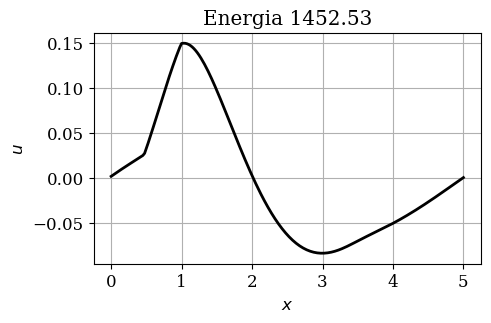

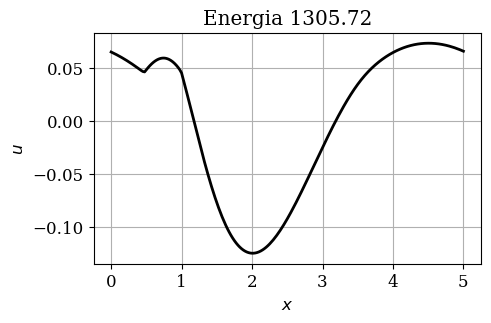

In [5]:
for j in range(3):
    plt.figure(figsize=(5,3))
    plt.grid('minor')
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    plt.plot(x, U[:,j], c='k', lw=2)
    plt.title(f'Energia {S[j]**2:.2f}')

In [6]:
U, S, V = np.linalg.svd(u, full_matrices=True)
print(S.shape)
n_r = 10
u_r = U[:,:n_r] @ np.diag(S)[:n_r,:n_r] @ V[:n_r,:]

(201,)


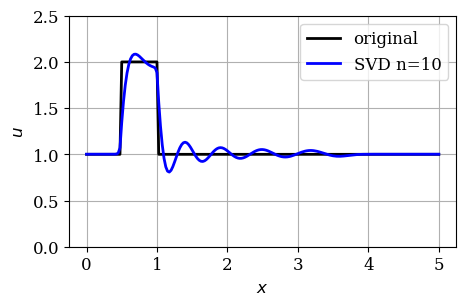

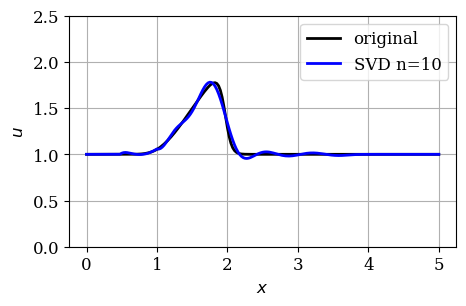

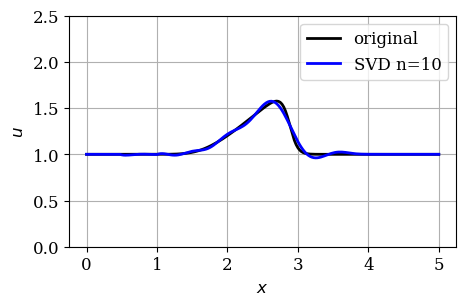

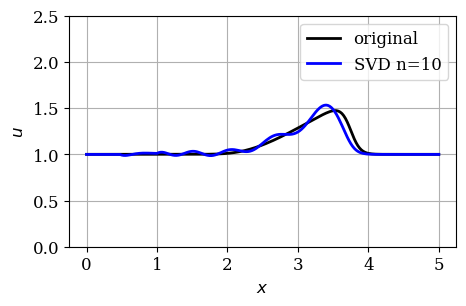

In [5]:
for n in range(u.shape[1]):
    plt.figure(figsize=(5,3))
    plt.grid('minor')
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    plt.plot(x, u[:,n], c='k', lw=2, label='original')
    plt.plot(x,u_r[:,n], c='b', lw=2, label=f'SVD n={n_r}')
    plt.ylim([0,2.5])
    plt.legend()
    plt.savefig(f'plots_burgers//burgers_{n:03d}.png')
    if n % int(u.shape[1]/3) == 0:
        plt.show()
    plt.close()


## POD
Recordar la ecuacion de burgers 

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}
$$

Considerar una expansion de la velocidad 
$$
u(x,t) = \bar{u}(x) + \sum_{j=1}^{r} a_j(t)\phi_j(\xi)
$$

Aplicando sobre la ecuacion de Burgers
$$
\frac{\partial u'}{\partial t} + \bar{u} \frac{\partial u'}{\partial x} + u' \frac{\partial \bar{u}}{\partial x} + u' \frac{\partial u'}{\partial x} = \nu\frac{\partial^2 u'}{\partial x^2}
$$

Los modos $\phi_j$ se pueden recuperar de la descomposicion SVD
$$
X(\xi,t) = u(\xi, t) - \bar{u}(\xi) \approx \sum_{j=1}^{r} a_j(t)\phi_j(\xi)
$$

SVD en $X(t)$

$$
X(t) = \Phi \Sigma \Psi^*
$$
En $\Phi$ estan los $r$ modos $\phi_j$ que definen el modelo de orden reducido, los coeficientes $a_j$ viene de proyectar estos modos en la ecuacion original

\begin{align*}
\frac{\partial }{\partial t} \left (  \sum_{j=1}^{r} a_j(t)\phi_j(x) \right) + \bar{u} \frac{\partial}{\partial x} \left (  \sum_{j=1}^{r} a_j(t)\phi_j(x)  \right ) +  \frac{\partial \bar{u}}{\partial x}  \left (  \sum_{j=1}^{r} a_j(t)\phi_j(x)  \right ) + \sum_{i=1}^{r} a_i(t)\phi_i(x) \frac{\partial }{\partial x} \left ( \sum_{j=1}^{r} a_j(t)\phi_j(x) \right ) = \nu\frac{\partial^2 }{\partial x^2} \left ( \sum_{j=1}^{r} a_j(t)\phi_j(x) \right ) 
\end{align*}

\begin{align*}
 \sum_{j=1}^{r} \frac{\partial a_j}{\partial t}(t) \phi_j(x)  + \bar{u} \sum_{j=1}^{r} a_j(t)\frac{\partial \phi_j}{\partial x}(x)  +  \frac{\partial \bar{u}}{\partial x}  \sum_{j=1}^{r} a_j(t)\phi_j(x)  + \sum_{i=1}^{r} a_i(t)\phi_i(x) \left ( \sum_{j=1}^{r} a_j(t)\frac{\partial \phi_j}{\partial x} (x) \right ) = \nu \left ( \sum_{j=1}^{r} a_j(t)\frac{\partial^2 \phi_j}{\partial x^2}(x) \right ) \\ 
  \sum_{j=1}^{r} \frac{\partial a_j}{\partial t}(t) \phi_j(x)  + \bar{u} \sum_{j=1}^{r} a_j(t)\frac{\partial \phi_j}{\partial x}(x)  +  \frac{\partial \bar{u}}{\partial x}  \sum_{j=1}^{r} a_j(t)\phi_j(x) + \sum_{i=1}^{r}  \sum_{j=1}^{r} a_i(t)\phi_i(x) a_j(t)\frac{\partial \phi_j}{\partial x} (x)  = \nu \left ( \sum_{j=1}^{r} a_j(t)\frac{\partial^2 \phi_j}{\partial x^2}(x) \right ) 
\end{align*}
Si hago el producto interno con un $\phi_k$ cualquiera
\begin{align*}
\sum_{j=1}^{r} \frac{\partial a_j}{\partial t}(t) \phi_j(x)  + \bar{u} \sum_{j=1}^{r} a_j(t)\frac{\partial \phi_j}{\partial x}(x)  \phi_k (x) +  \frac{\partial \bar{u}}{\partial x}  \sum_{j=1}^{r} a_j(t)\phi_j(x)\phi_k (x) + \sum_{i=1}^{r}  \sum_{j=1}^{r} a_i(t)\phi_i(x) a_j(t)\frac{\partial \phi_j}{\partial x} (x)  = \nu \left ( \sum_{j=1}^{r} a_j(t)\frac{\partial^2 \phi_j}{\partial x^2}(x) \right )  \\
\frac{\partial a_k}{\partial t}(t) +  \sum_{j=1}^{r} \left ( \bar{u} \frac{\partial \phi_j}{\partial x}(x) + \frac{\partial \bar{u}}{\partial x} \phi_{j}(x) \right )\phi_k (x) a_j(t) +  \sum_{i=1}^{r}  \sum_{j=1}^{r} a_i(t)a_j(t)\phi_i(x) \frac{\partial \phi_j}{\partial x} (x) \phi_k (x) = \nu \left ( \sum_{j=1}^{r} a_j(t)\frac{\partial^2 \phi_j}{\partial x^2}(x) \phi_k(x) \right )  
\end{align*}
Definiendo
\begin{align*}
\alpha_{jk} = \langle \frac{\partial^2 \phi_j}{\partial x^2}, \phi_k \rangle \\
\bar{\alpha}_{jk} = \langle \bar{u} \frac{\partial \phi_j}{\partial x}(x) + \frac{\partial \bar{u}}{\partial x} \phi_{j}(x) , \phi_k \rangle \\
\beta_{ijk} = \langle \phi_i \frac{\partial \phi_j}{\partial x}, \phi_k  \rangle 
\end{align*}
Escribiendo de manera reducida
$$
\frac{\partial a_k}{\partial t}  = \nu \sum_{j=1}^{r} \alpha_{jk} a_j - \sum_{i=1}^{r}  \sum_{j=1}^{r} \beta_{ijk} a_ia_j - \sum_{j=1}^{r} \bar{\alpha}_{jk} a_j
$$

In [26]:
u_mean = np.mean(u,axis=1)
X = u - u_mean.reshape(u_mean.shape[0],-1)
Phi, Sigma, Psi = np.linalg.svd(X, full_matrices=True)
print(np.sum(Sigma[:15]**2)/np.sum(Sigma**2))
print(Phi.shape)
phi_r = Phi[:,:15]


0.9910869447034344
(201, 201)


In [30]:
# Paso 1: FFT de la función
f_fft = np.fft.fft(phi_r)

# Paso 2: Crear los números de onda k
n = f.size
dx = x[1] - x[0]  # Espaciado entre los puntos
k = 2 * np.pi * np.fft.fftfreq(n, d=dx)

# Paso 3: Multiplicar por ik para derivar en el espacio de Fourier
f_fft_deriv = 1j * k * f_fft

# Paso 4: Inversa de la FFT para obtener la derivada
f_deriv = np.fft.ifft(f_fft_deriv).real

(201,)

Definiendo
\begin{align*}
\alpha_{jk} = \langle \frac{\partial^2 \phi_j}{\partial x^2}, \phi_k \rangle \\
\bar{\alpha}_{jk} = \langle \bar{u} \frac{\partial \phi_j}{\partial x}(x) + \frac{\partial \bar{u}}{\partial x} \phi_{j}(x) , \phi_k \rangle \\
\beta_{ijk} = \langle \phi_i \frac{\partial \phi_j}{\partial x}, \phi_k  \rangle 
\end{align*}

In [36]:
n_modes = phi_r.shape[1]
deltax = dx
phix = np.zeros_like(phi_r, dtype=complex)
phixx = np.zeros_like(phi_r, dtype=complex)
du_mean = np.zeros_like(u_mean)
du_mean[1:-1] = (1/(2*deltax))*(u_mean[2:] - u_mean[:-2])
phix[1:-1] = (1/(2*deltax))*(phi_r[2:] - phi_r[:-2])
phixx[0] = (1/deltax**3)*(2*phi_r[0]-5*phi_r[1]+4*phi_r[2]-phi_r[3])
phixx[-1] = (1/deltax**3)*(2*phi_r[-1]-5*phi_r[-2]+4*phi_r[-3]-phi_r[-4])
phixx[1:-1] = (1/deltax**2)*(phi_r[2:] - 2*phi_r[1:-1] + phi_r[:-2])

alpha = np.zeros((n_modes,n_modes), dtype=complex)
alpha_bar = np.zeros((n_modes,n_modes), dtype=complex)
beta = np.zeros((n_modes,n_modes,n_modes), dtype=complex)
for i in range(phi_r.shape[1]):
    for j in range(phi_r.shape[1]):
        alpha[i,j] = np.trapz(phixx[:,i]*phi_r[:,j])
        alpha_bar[i,j] = np.trapz((u_mean*phix[:,i] + du_mean*phi_r[:,i])*phi_r[:,j])

for i in range(phi_r.shape[1]):
    for j in range(phi_r.shape[1]):
        for k in range(phi_r.shape[1]):
            beta[i,j,k] = np.trapz(phi_r[:,i]*phix[:,j]*phi_r[:,k])


In [ ]:
global alpha, beta, sigma, n_modes
def nls_rom2(ut_split,t,k=k):
    ut = ut_split[:n_modes] + (1j)*ut_split[n_modes:]
    rhs = np.zeros(2,dtype=complex)
    mag_u1 = ut[0].conj()*ut[0]
    mag_u2 = ut[1].conj()*ut[1]
    #alpha (symmetric)
    rhs[0] = 0.5*(alpha@ut)[0] 
    rhs[1] = 0.5*(alpha@ut)[1]
    #beta\sigma
    rhs[0] += (beta[0,0,0]*mag_u1 + 2*beta[1,0,0]*mag_u2)*ut[0] + (beta[1,1,0]*mag_u2 + 2*beta[0,1,0]*mag_u1)*ut[1] +\
            sigma[0,1,0]*(ut[0]**2)*ut[1].conj() + sigma[1,0,0]*(ut[1]**2)*ut[0].conj()
    rhs[1] += (beta[0,0,1]*mag_u1 + 2*beta[1,0,1]*mag_u2)*ut[0] + (beta[1,1,1]*mag_u2 + 2*beta[0,1,1]*mag_u1)*ut[1] +\
            sigma[0,1,1]*(ut[0]**2)*ut[1].conj() + sigma[1,0,1]*(ut[1]**2)*ut[0].conj()
    rhs[0] = (1j)*rhs[0]
    rhs[1] = (1j)*rhs[1]
    rhs_split = np.concatenate((np.real(rhs),np.imag(rhs)))
    return rhs_split

N = 2
u2 = N/np.cosh(x)   # initial conditions
ut2 = np.zeros((2),dtype=complex)
ut2[0] = np.trapz(u2*phi[:,0])
ut2[1] = np.trapz(u2*phi[:,1])

ut2_split = np.concatenate((np.real(ut2),np.imag(ut2))) # Separate real/complex pieces

ut2sol_split = integrate.odeint(nls_rom2,ut2_split,t,mxstep=10**6)
ut2sol = ut2sol_split[:,:n_modes] + (1j)*ut2sol_split[:,n_modes:]

u2sol_rom2 = np.zeros((ut2sol.shape[0],phi.shape[0]),dtype=complex)
for jj in range(len(t)):
    u2sol_rom2[jj,:] = ut2sol[jj,0]*phi[:,0] + ut2sol[jj,1]*phi[:,1]  # transforming back

In [20]:
n_r = 15
u_r = Phi[:,:n_r] @ np.diag(Sigma)[:n_r,:n_r] @ Psi[:n_r,:]
print(u_r.shape)

(201, 1200)


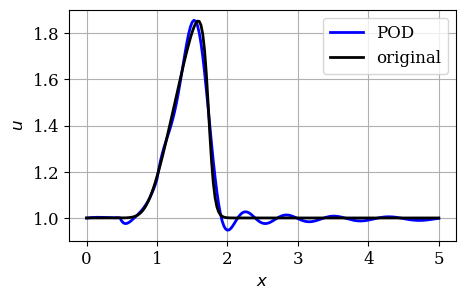

In [23]:
nn = 100
plt.figure(figsize=(5,3))
plt.grid('minor')
plt.ylabel('$u$')
plt.xlabel('$x$')
plt.plot(x, u_mean + u_r[:,nn], c='b', lw=2, label='POD')
plt.plot(x, u[:,nn], c='k', lw=2, label='original')
plt.legend()

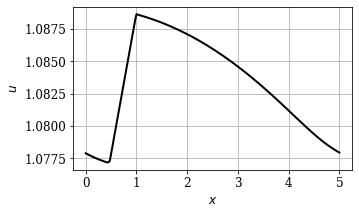

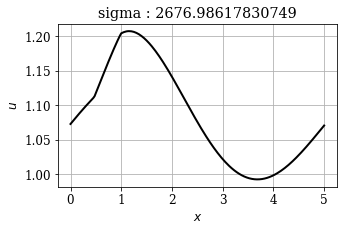

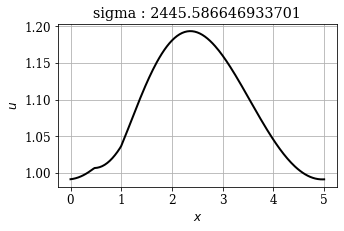

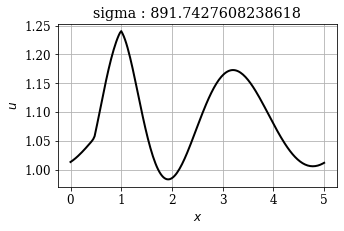

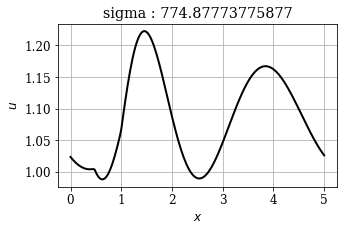

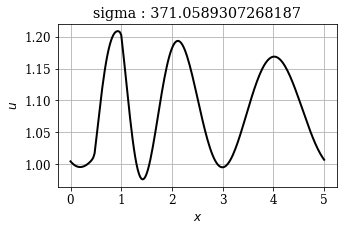

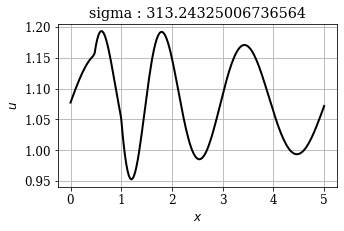

In [40]:
plt.figure(figsize=(5,3))
plt.grid('minor')
plt.ylabel('$u$')
plt.xlabel('$x$')
plt.plot(x, u_mean, c='k', lw=2, label='original')


for n in range(0,6):
    plt.figure(figsize=(5,3))
    plt.grid('minor')
    plt.ylabel('$u$')
    plt.xlabel('$x$')
    plt.plot(x, u_mean + Phi[:,n], c='k', lw=2, label='original')
    plt.title(f'sigma : {Sigma[n]**2}')
